### IDs:
Insert yours IDs to the cell below

ID #1: 316420132

ID #2: 324369412


## Read the following instructions carefully:
1. This Jupyter notebook contains all the step-by-step instructions needed for this exercise.
1. Write **efficient**, **vectorized** code whenever possible. 
1. Some questions require you to write your functions and answers in this jupyter notebook only. For these questions, you are free to add cells to this notebook.
1. For the other questions, you need to complete the required functions in the `hw2.py` script only. Only the functions in the `hw2.py` script are tested for this type of question.
1. In the function signatures include parameters with default values only. (`def example(a=1, b=2):`).
1. Submission includes a **zip** file that contains the `hw2.py` script as well as this notebook, with your ID as the file name. For example, `hw2_123456789_987654321.zip` if you submitted in pairs and `hw2_123456789.zip` if you submitted the exercise alone.

### Question 1 - Data exploration and visialization - practical

Load California dataset from sklearn.
Explore the data. 
Follow the instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. Describe the dataset. How many samples does it contain? How many features? What is the data type for each variable?
2. Produce a histogram and a boxplot of the HouseAge. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behavior?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the HouseAge variable and add two vertical lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 "interesting" trends in the data. No need to provide statistical confidence at this point. 

In [1]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Load the California housing dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Target'] = california.target  # Add target variable (house prices)

In [2]:
# Step 1: Describe the dataset
print("Dataset Description:")
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1] - 1} (excluding target)")
print("\nData Types:")
print(df.dtypes)
print("\nStatistical Summary:")
print(df.describe())

Dataset Description:
Number of samples: 20640
Number of features: 8 (excluding target)

Data Types:
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
Target        float64
dtype: object

Statistical Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000 

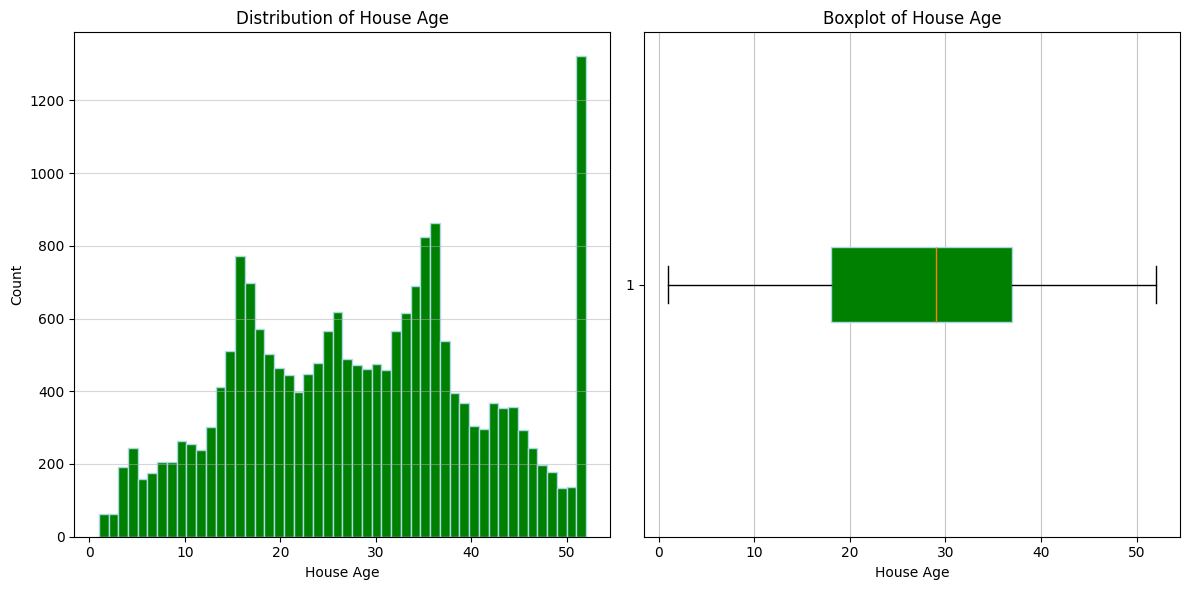


House Age Distribution:
count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: HouseAge, dtype: float64


In [3]:
# Step 2: Plot histogram and boxplot for HouseAge
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['HouseAge'], bins=50, color='green', edgecolor='lightblue')
plt.title("Distribution of House Age")
plt.xlabel("House Age")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='-', alpha=0.5)

plt.subplot(1, 2, 2)
plt.boxplot(df['HouseAge'], vert=False, patch_artist=True, boxprops=dict(facecolor='green', edgecolor='lightblue'))
plt.title("Boxplot of House Age")
plt.xlabel("House Age")
plt.grid(axis='x', linestyle='-', alpha=0.75)

plt.tight_layout()
plt.show()

# Describe distribution
print("\nHouse Age Distribution:")
print(df['HouseAge'].describe())

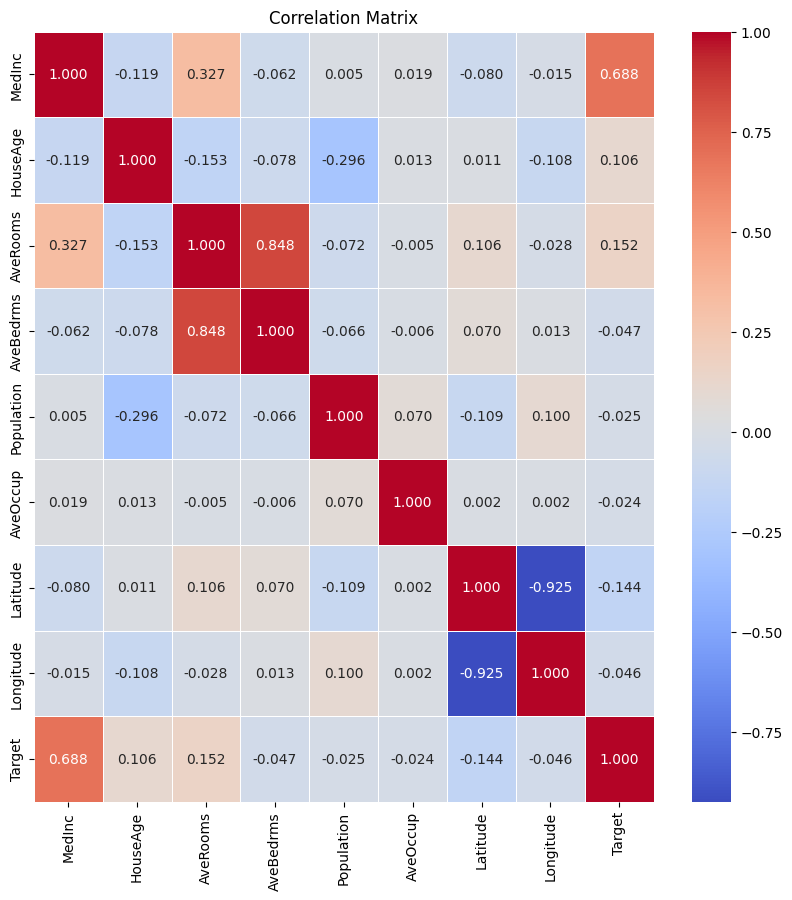

In [4]:
# Step 3: Correlation Matrix
correlation_matrix = df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".3f", cbar=True, linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [5]:
# Step 4: Find highest correlated pairs
corr_pairs = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False)
highest_corr_pairs = corr_pairs[(corr_pairs < 1) & (corr_pairs > 0.5) | (corr_pairs < -0.5)]
print("\nHighly Correlated Pairs:")
print(highest_corr_pairs)


Highly Correlated Pairs:
AveBedrms  AveRooms     0.847621
AveRooms   AveBedrms    0.847621
Target     MedInc       0.688075
MedInc     Target       0.688075
Latitude   Longitude   -0.924664
Longitude  Latitude    -0.924664
dtype: float64


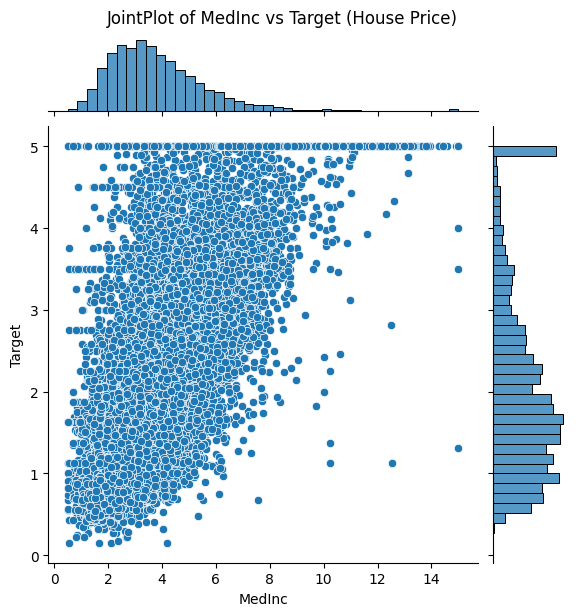

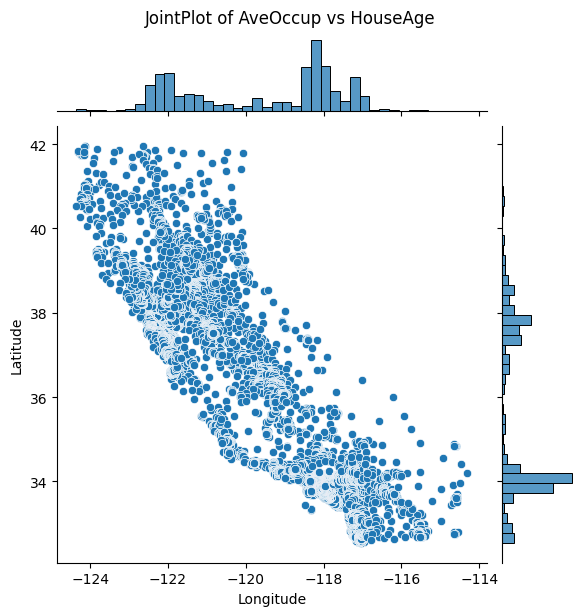

In [6]:
# Scatter plots for top 2 correlated pairs
sns.jointplot(x='MedInc', y='Target', data=df, kind='scatter', marginal_kws=dict(bins=40, fill=True))
plt.suptitle("JointPlot of MedInc vs Target (House Price)", y=1.02)

sns.jointplot(x='Longitude', y='Latitude', data=df, kind='scatter', marginal_kws=dict(bins=40, fill=True))
plt.suptitle("JointPlot of AveOccup vs HouseAge", y=1.02)
plt.show()

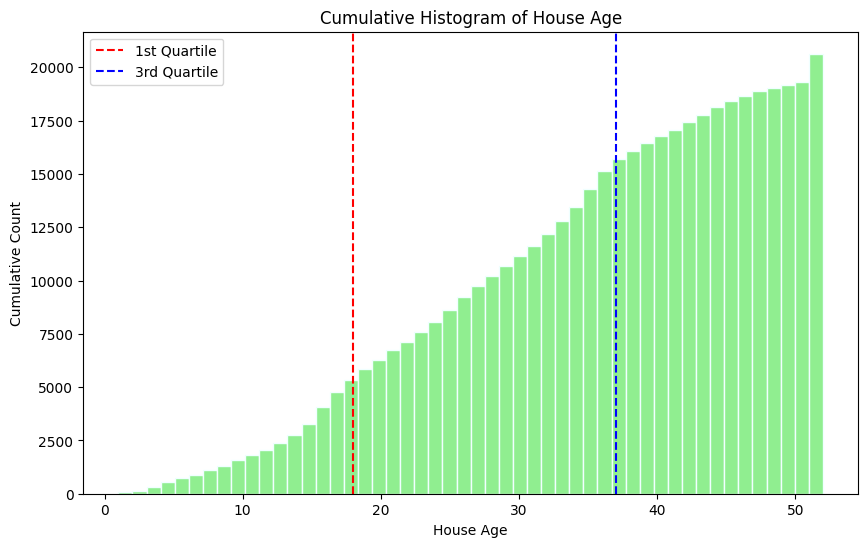

In [7]:
# Step 5: Cumulative Histogram for HouseAge
plt.figure(figsize=(10, 6))
plt.hist(df['HouseAge'], bins=50, cumulative=True, color='lightgreen', edgecolor='azure')
plt.axvline(np.percentile(df['HouseAge'], 25), color='red', linestyle='dashed', label='1st Quartile')
plt.axvline(np.percentile(df['HouseAge'], 75), color='blue', linestyle='dashed', label='3rd Quartile')
plt.title("Cumulative Histogram of House Age")
plt.xlabel("House Age")
plt.ylabel("Cumulative Count")
plt.legend()
plt.show()

In [8]:
# Step 6: Identify Interesting Trends
print("\nInteresting Trends:")
print("1. Median Income (MedInc) has a strong positive correlation with house prices (Target). Higher income areas tend to have higher house prices.")
print("2. Average Occupancy (AveOccup) shows some negative correlation with house age, suggesting that older houses tend to have fewer occupants.")


Interesting Trends:
1. Median Income (MedInc) has a strong positive correlation with house prices (Target). Higher income areas tend to have higher house prices.
2. Average Occupancy (AveOccup) shows some negative correlation with house age, suggesting that older houses tend to have fewer occupants.


### Question 2 - Independence and conditional independence

#### 2.A
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k$ possible outcomes respectively.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

Complete the function `q2a` in `hw2.py` to answer this question.

In [9]:
from hw2 import q2a

X = np.array([[1, 2, 3], [0.3, 0.4, 0.3]])
Y = np.array([[1, 2], [0.6, 0.4]])
Z = np.array([[1, 2, 3, 4], [0.25, 0.25, 0.25, 0.25]])

q2a(X, Y, Z)

23

#### 2.B
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

Complete the function `q2b` in `hw2.py` to answer this question.

In [10]:
from hw2 import q2b

X = np.array([[1, 2, 3], [0.3, 0.4, 0.3]])
Y = np.array([[1, 2], [0.6, 0.4]])
Z = np.array([[1, 2, 3, 4], [0.25, 0.25, 0.25, 0.25]])

print(q2b(X, Y, Z))

6


#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionally independent given $Z$?

Complete the function `q2c` in `hw2.py` to answer this question.

In [11]:
from hw2 import q2c

q2c(X,Y,Z)

15

### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3$. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

#### 3.A
Provide an estimate for the other parameters of the distribution using Algebra.

Write your solution in a Markdown cell below

In [12]:
import pandas as pd
import numpy as np
from IPython.display import display, Latex

data = pd.read_csv('./GMD.csv', header=None, names=["Values"])
mean = data['Values'].mean()
std = data['Values'].std()

latex = rf"""
\[
\mu_{{\text{{data}}}} = {mean:.2f} \quad \sigma_{{\text{{data}}}} = {std:.2f}
\]
"""

display(Latex(latex))

<IPython.core.display.Latex object>

In the above code, the mean and the std of the GMD given in GMD.csv are calculated.

Given: $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Need to find: $\mu_{3}$, $w_1$ and $w_3$


Since the data is a GMM with $k=3$, the following equations are implied:
$$(1) \hspace{1cm} w_{1} + w_{2} + w_{3} = 1$$
$$(2) \hspace{1cm} \mu_{\text{data}} = w_{1}\mu_{1}+w_{2}\mu_{2}+w_{3}\mu_{3}$$
$$(3) \hspace{1cm} \sigma_{data}^2=w_{1}\sigma_{1}^2+w_{2}\sigma_{2}^2+w_{3}\sigma_{3}^2+w_{1}(\mu_1-\mu_{\text{data}})^2+w_{2}(\mu_2-\mu_{\text{data}})^2+w_{3}(\mu_3-\mu_{\text{data}})^2$$

substituing the known parameters we get:
$$ (1) \hspace{1cm} w_1 + w_3 = 1 - w_2 = 1 - 0.25 = 0.75 $$ 
$$ (2) \hspace{1cm} \mu_{\text{data}} = 4w_1 + 0.25\cdot9 + w_3\mu_3 = 4w_1 + 2.25 + w_3\mu_3 = 12.20$$
$$ (3) \hspace{1cm} \sigma_{\text{data}}^2 = w_1\cdot 0.5^2 + 0.25\cdot 0.5^2 + w_3 \cdot 1.5^2 + w_1(4-\mu_{\text{data}})^2 + 0.25(9-\mu_{\text{data}})^2 + w_3(\mu_3 - \mu_{\text{data}})^2 =$$$$ 0.25 w_1 +0.0625 + 2.25 w_3 + w_1(4-\mu_{\text{data}})^2 + 0.25(9-\mu_{\text{data}})^2+w_3(\mu_3-\mu_{\text{data}})^2$$
$$ = w_1 (0.25 + (4-\mu_{\text{data}})^2) + w_3(2.25+ (\mu_3-\mu_{\text{data}})^2) + 0.25(9-\mu_{\text{data}})^2 +0.0625 = (4.19)^2 $$
$$ = w_1 (0.25 + (4-12.2)^2) + w_3(2.25+ (\mu_3-12.2)^2) + 0.25(9-12.2)^2 +0.0625 = 67.49 w_1 + (2.25+ (\mu_3-12.2)^2 w_3 + 2.6225 =
(4.19)^2 = 17.5561 $$

$ \Rightarrow $: and finally:
$$ (1) \hspace{1cm} w_1 + w_3 = 0.75$$
$$ (2) \hspace{1cm} 4 w_1 +w_3\mu_3 = 9.95$$
$$(3) \hspace{1cm} 67.49 w_1 + \left(2.25+ (\mu_3-12.2)^2\right) w_3 = 14.9336$$

Let's solve the equation system: 

From equation $(1) \Rightarrow w_3 = 1 - w_1$. Substituing $w_3$ to equation $(2)$ and simplifying: $w_1 = \frac{9.95 - 0.75\mu_3}{4-\mu_3} \Rightarrow w_3 = 0.75 - \frac{9.95 - 0.75\mu_3}{4-\mu_3}$ .
Substituing $w_1$ and $w_3$ will give:
$$ 67.49 \left( \frac{9.95 - 0.75\mu_3}{4-\mu_3} \right) + \left( 2.25+(\mu_3-12.2)^2 \right) \left(0.75 - \frac{9.95 - 0.75\mu_3}{4-\mu_3} \right) = 14.9336$$

Opening parenthesis and simplifying will get us the quadratic equation:
$$ 1.0471\mu_3^2 - 23.1598\mu_3 + 196.81604 = 0 $$

Solving the equation with the quadratic formula will get two solutions: $ \mu_{3,1} = 4.1804$ and $ \mu_{3,2} = 15.0852 $.
substituing to $w_1 = \frac{9.95 - 0.75\mu_3}{4-\mu_3} $ and $w_3 = 0.75 - w_1$ will get us the following solutions:
$$ 1. \hspace{0.25cm} \mu_3 = 4.1804,\hspace{0.25cm} w_1 = -37.77, \hspace{0.25cm} w_3 = 38.52$$
$$ 2. \hspace{0.25cm} \mu_3 = 15.0852,\hspace{0.25cm} w_1 = 0.123, \hspace{0.25cm} w_3 = 0.627$$

Since $\forall i, w_i > 0 $ only solution $(2)$ is valid and:
$$ \mu_3 = 15.0852,\hspace{0.25cm} w_1 = 0.123, \hspace{0.25cm} w_3 = 0.627 $$

#### 3.B
Provide an estimate for the other parameters of the distribution using EM.

Your EM algorithm should support the fact that some of the parameter values are known in advance.

Complete the function `my_EM` in `hw2.py` to answer this question.

In [13]:
from hw2 import my_EM

my_EM()

([4, 9, 15.103440536580578],
 [0.5, 0.5, 1.5],
 [0.12502169044253864, 0.25, 0.6249783095574613])

#### 3.C
Now assume that the data comes from a Gaussian mixture distribution (GMD) with $k=4$.

The given data and parameters stay the same.

Provide an estimate for the other parameters of the distribution using EM. 

You need to use my_EM function from the previous section to answer this question. Your function should support any number of Gaussians and the specific known parameters in this question. 

In [14]:
from hw2 import my_EM

my_EM(mus=[4,9,None,None], sigmas=[0.5,0.5,1.5,None], ws=[None, 0.25, None, None], max_iters=30)

([4, 9, 10.194805372583577, 15.104020482487684],
 [0.5, 0.5, 1.5, 2.2487300827973944],
 [0.12497470621468006, 0.25, 0.00038091214981070444, 0.6246443816355092])

#### 3.D
Write a function for generating data for a GMM random variable.

Complete the function `q3d` in `hw2.py` to answer this question.


In [15]:
from hw2 import q3d

X = q3d()
print(X)

[ 2.57939695 10.08859702  8.93383953  0.54189844 10.84378207  0.45369708
 11.5594133   0.56882951  8.12251031 10.0635864   2.09755276  2.29131987
  9.70633143  9.58546586  2.2085652   8.05818831 11.11234461 10.83083669
  9.94938587  2.25021865  9.889503   10.73660871  0.43782462  2.33163693
  9.62650766  9.04593398  8.76699982  0.52416191  9.61935827  8.87678959
  9.67715171  2.35577549  9.80089601  2.12990164  0.54881446  0.5897224
  2.11636839  2.13512015  0.36199897  2.23451374  9.69573896  9.0909855
  0.4175734   9.85853515  0.58230108  0.50727409 10.98889626  9.9859396
  0.49476574  9.66614997  2.40303403  7.94443861  9.88796595  9.53291793
 10.66506134  9.22145468  8.03432188  9.55960334  9.1894003   9.01977675
  2.43128724  9.6878416   2.35640409  9.77457365  0.58661328  8.9539378
  2.19943766  2.31852321  0.59171236 10.00789007  9.85606124 12.28236289
  9.33754135  9.31531905  0.52986919  9.00411262 10.0341771   9.32633961
  1.97198264  2.12201695 10.14026607  0.64752229  9.017

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximately normally distributed with a mean of 75,000 RCU and a standard deviation of 37,500 RCU.

Complete the functions in `hw2.py` to answer the following question.

#### 4.A
What percent of people earn less than 50,000 RCU?

In [16]:
from hw2 import q4a

X = q4a()
X

np.float64(25.24925375469229)

#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [17]:
from hw2 import q4b

X = q4b()
X

np.float64(18.30075118806284)

#### 4.C
What percent of people earn more than 85,000 RCU?

In [18]:
from hw2 import q4c

X = q4c()
X

np.float64(39.48629104640251)

#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [19]:
from hw2 import q4d

X = q4d()
X

np.float64(41.51821968877911)

### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types.


#### 5.A
Write code to compute the exact value of $E(T_{N})$

Complete the function `CC_Expected` in `hw2.py` to answer the following question.

In [20]:
from hw2 import CC_Expected

CC_Expected()

29.289682539682538

#### 5.B
Write code to compute the exact value of $V(T_{N})$

Complete the function `CC_Variance` in `hw2.py` to answer the following question.

In [21]:
from hw2 import CC_Variance

CC_Variance()

125.68709057697154

#### 5.C
Write code to exactly compute $P(T_{10}>30)$

Complete the function `CC_T_Steps` in `hw2.py` to answer the following question.

In [22]:
from hw2 import CC_T_Steps

CC_T_Steps()

np.float64(0.37086281074726135)

#### 5.D
Let $S_N$ denote the waiting time until $N$ different coupons are collected **twice**.

Write code to exactly compute $P(S_{10}>30)$

Complete the function `CC_S_Steps` in `hw2.py` to answer the following question.

In [23]:
from hw2 import CC_S_Steps

CC_S_Steps()

np.float64(0.9305990619194948)